![title](UCN ICI.png)

 #  <font color= #007FFF> K-mean Algorithm </font>

<div class="alert alert-info"> </h4> **Material preparado para el Master de Ingeniería Civil Industrial | Universidad Católica del Norte | Escuela de Ingeniería - Campus Coquimbo | Curso - Predictive Analytics.**
</h4> </div>



El banco Intercon quiere segmentar a sus clientes de mejor manera y en base a su comportamiento de compra con el fin de poder ofrecerle promociones o servicios que se ajusten de mejor manera a su perfil. 

**Pregunta: **

¿Cuántos segmento de clientes debe utilizar?
¿Qué le debe ofrecer a cada segmento?


Fuente:
Dennys Rodriguez & Carlos Quintanilla, "Banco Intercon y la Segmentacion Cientifica", Case 12017, INCAE Business School. 
	

# <font color= #007FFF> 1.- Data Analysis </font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import preprocessing


In [2]:
df=pd.read_csv("intercon_amounts.csv")
df.describe()

,idcliente,cash,airlines,travelagencies,casinos,internet,drugstores,gasstations,hotels,other,autorental,restaurants,supermarkets,electronics,departmentstores,globalamount
count,15786.00000,15786.000000,15786.000000,15786.00000,1.578600e+04,15786.000000,15786.000000,15786.000000,15786.000000,15786.000000,15786.000000,15786.000000,15786.000000,1.578600e+04,15786.000000,1.578600e+04
mean,507893.50000,10505.959377,936.705633,133.29680,4.306658e+02,115.087693,285.321733,1424.503824,621.775811,935.102623,50.858335,1142.120152,4446.432915,2.016082e+03,1664.662075,2.470857e+04
std,4557.17001,21300.982168,9957.351716,2626.62259,1.418039e+04,3057.142990,1463.272796,7154.473861,5388.347715,8162.116693,1017.011864,3501.296333,11863.726033,2.679164e+04,7780.847501,5.193007e+04
min,500001.00000,0.000000,0.000000,0.00000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,503947.25000,0.000000,0.000000,0.00000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,6.955020e+03
50%,507893.50000,5880.000000,0.000000,0.00000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,211.200000,1496.760000,0.000000e+00,0.000000,1.330428e+04
75%,511839.75000,12000.000000,0.000000,0.00000,0.000000e+00,0.000000,0.000000,888.000000,0.000000,0.000000,0.000000,1056.600000,4211.580000,1.145040e+03,1319.940000,2.407188e+04
max,515786.00000,812592.240000,777277.440000,159691.20000,1.022280e+06,285571.920000,67200.000000,298750.080000,274806.240000,593616.000000,80953.200000,131394.240000,499850.160000,2.402808e+06,458359.920000,2.668937e+06


In [3]:
df.drop(['globalamount'],axis=1,inplace=True)
df.drop(['idcliente'],axis=1,inplace=True)
df.head()

,cash,airlines,travelagencies,casinos,internet,drugstores,gasstations,hotels,other,autorental,restaurants,supermarkets,electronics,departmentstores
0,0.0,0.00,0.0,0.0,0.0,0.00,240.0,0.00,0.0,0.0,1043.76,4784.16,0.0,0.00
1,0.0,10698.24,0.0,0.0,0.0,0.00,0.0,22165.68,3594.0,0.0,0.00,8639.28,0.0,3347.28
2,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,773.52,3628.08,0.0,0.00
3,15120.0,0.00,0.0,0.0,0.0,107.28,0.0,0.00,0.0,0.0,0.00,7132.32,0.0,1438.80
4,240.0,0.00,0.0,0.0,0.0,0.00,1320.0,0.00,0.0,0.0,10668.96,0.00,2785.2,0.00


In [4]:
X = preprocessing.scale(df)
X

array([[-0.49323041, -0.09407474, -0.05074997, ...,  0.0284681 ,
        -0.07525279, -0.21395032],
       [-0.49323041,  0.98036545, -0.05074997, ...,  0.35342858,
        -0.07525279,  0.21625809],
       [-0.49323041, -0.09407474, -0.05074997, ..., -0.0689816 ,
        -0.07525279, -0.21395032],
       ..., 
       [ 0.01380452, -0.09407474, -0.05074997, ..., -0.37480415,
        -0.03558543, -0.12582345],
       [-0.29605016, -0.09407474, -0.05074997, ..., -0.37480415,
        -0.07525279, -0.21395032],
       [-0.21154433, -0.09407474, -0.05074997, ..., -0.1580964 ,
        -0.04987392,  0.01708582]])

In [5]:
#preprocessing.scale(df) # Cambia Data - NO distribución
#preprocessing.StandardScaler(df)  #  Cambia Data - distribution Normal
#preprocessing.normalize(df) # No recomendada - similar Stadardarize
#preprocessing.MinMaxScaler(df) # Recomendada - data entre el min y el max.

In [6]:
k_mean=KMeans(n_clusters=4)
k_mean.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [7]:
etiqueta=k_mean.labels_
etiqueta

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [8]:
etiquetas=list(np.unique(etiqueta))
etiquetas

[0, 1, 2, 3]

In [9]:
df["Cluster"]=etiqueta
df.head()    

,cash,airlines,travelagencies,casinos,internet,drugstores,gasstations,hotels,other,autorental,restaurants,supermarkets,electronics,departmentstores,Cluster
0,0.0,0.00,0.0,0.0,0.0,0.00,240.0,0.00,0.0,0.0,1043.76,4784.16,0.0,0.00,0
1,0.0,10698.24,0.0,0.0,0.0,0.00,0.0,22165.68,3594.0,0.0,0.00,8639.28,0.0,3347.28,0
2,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,773.52,3628.08,0.0,0.00,0
3,15120.0,0.00,0.0,0.0,0.0,107.28,0.0,0.00,0.0,0.0,0.00,7132.32,0.0,1438.80,0
4,240.0,0.00,0.0,0.0,0.0,0.00,1320.0,0.00,0.0,0.0,10668.96,0.00,2785.2,0.00,0


In [10]:
# cluster nº 1:
Resumen=df.groupby(['Cluster']).mean()
Resumen

,cash,airlines,travelagencies,casinos,internet,drugstores,gasstations,hotels,other,autorental,restaurants,supermarkets,electronics,departmentstores
Cluster,,,,,,,,,,,,,,
0,10084.752121,667.699161,58.086247,199.307568,74.467506,198.422828,1041.548796,343.711469,534.932758,18.228780,867.504382,3617.039005,1516.288625,1192.436441
1,30516.060000,7370.100000,0.000000,847566.000000,0.000000,234.840000,6725.160000,2552.220000,2628.600000,0.000000,4789.800000,6955.680000,6380.340000,10008.720000
2,28919.398537,9531.043902,1099.707073,1006.463415,1888.836585,4287.055610,18844.898780,13498.448780,19296.787317,1547.519268,13754.201707,42875.659024,25185.161707,23316.705366
3,49053.600000,131922.648000,84643.536000,0.000000,4715.976000,3255.312000,19351.032000,6937.296000,16016.784000,1373.808000,10123.368000,23880.072000,12204.936000,17445.288000


In [11]:
res = Resumen.div(Resumen.sum(axis=1), axis=0)
res

,cash,airlines,travelagencies,casinos,internet,drugstores,gasstations,hotels,other,autorental,restaurants,supermarkets,electronics,departmentstores
Cluster,,,,,,,,,,,,,,
0,0.494001,0.032707,0.002845,0.009763,0.003648,0.009720,0.051020,0.016837,0.026204,0.000893,0.042495,0.177181,0.074275,0.058411
1,0.032964,0.007961,0.000000,0.915567,0.000000,0.000254,0.007265,0.002757,0.002839,0.000000,0.005174,0.007514,0.006892,0.010812
2,0.141035,0.046481,0.005363,0.004908,0.009212,0.020907,0.091903,0.065829,0.094107,0.007547,0.067077,0.209097,0.122823,0.113711
3,0.128775,0.346323,0.222206,0.000000,0.012380,0.008546,0.050800,0.018212,0.042047,0.003607,0.026576,0.062690,0.032040,0.045797


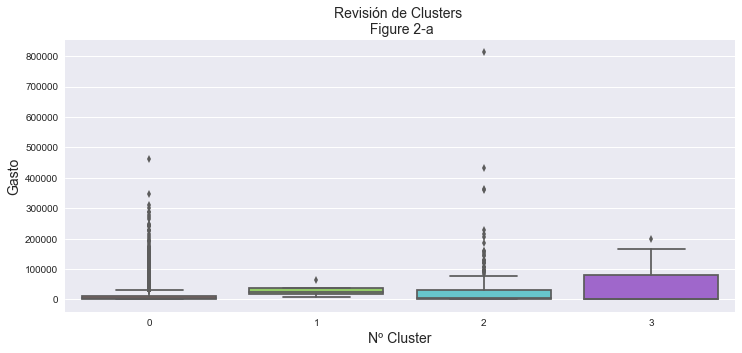

In [12]:
# library & dataset
plt.figure(figsize=(12,5))
sns.set(style="darkgrid")

# specific order
p1=sns.boxplot(x='Cluster',y='cash',data=df,palette="hls")

plt.xlabel("Nº Cluster",fontsize=14)
plt.ylabel("Gasto",fontsize=14)
plt.title("Revisión de Clusters \n Figure 2-a",fontsize=14)
#plt.savefig('cluster_1.png')
plt.show()

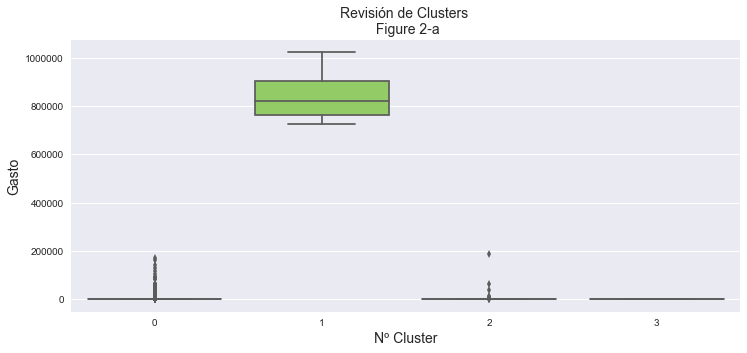

In [13]:
# library & dataset
plt.figure(figsize=(12,5))
sns.set(style="darkgrid")

# specific order
p1=sns.boxplot(x='Cluster',y='casinos',data=df,palette="hls")

plt.xlabel("Nº Cluster",fontsize=14)
plt.ylabel("Gasto",fontsize=14)
plt.title("Revisión de Clusters \n Figure 2-a",fontsize=14)
#plt.savefig('cluster_1.png')
plt.show()

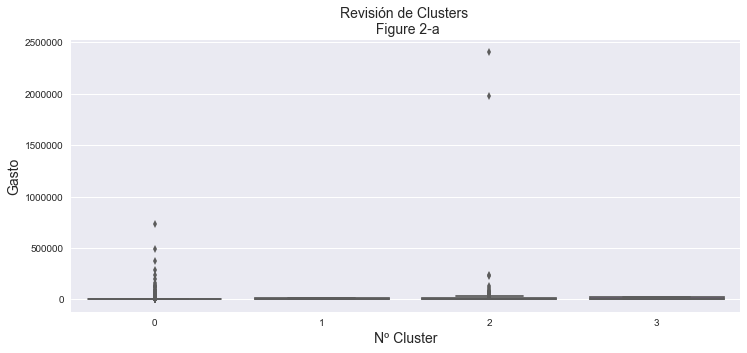

In [14]:
# library & dataset
plt.figure(figsize=(12,5))
sns.set(style="darkgrid")

# specific order
p1=sns.boxplot(x='Cluster',y='electronics',data=df,palette="hls")

plt.xlabel("Nº Cluster",fontsize=14)
plt.ylabel("Gasto",fontsize=14)
plt.title("Revisión de Clusters \n Figure 2-a",fontsize=14)
#plt.savefig('cluster_1.png')
plt.show()

In [15]:
def colores(n):
    color=['green','red','blue','black','magenta','cyan']
    Color=color[n]
    return Color

In [16]:
colores=list(map(colores,df['Cluster']))

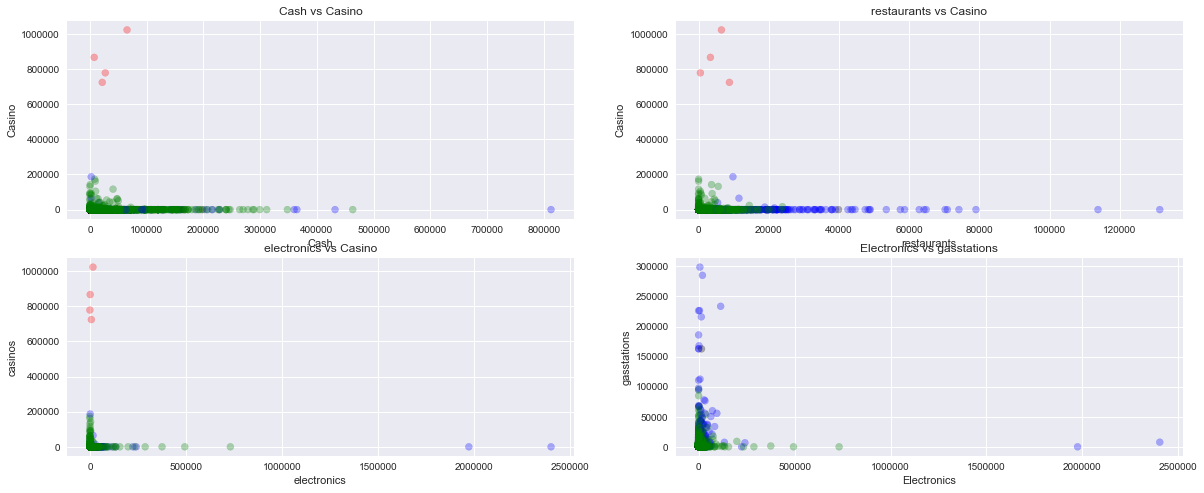

In [17]:
color=['green','red','blue','black','magenta','cyan']
sns.set(style='darkgrid')
plt.figure(figsize=(20,8))

plt.subplot(2,2,1)
plt.scatter(df['cash'],df['casinos'],color=colores,alpha=0.3)
plt.title("Cash vs Casino")
plt.xlabel("Cash")
plt.ylabel("Casino")

plt.subplot(2,2,2)
plt.scatter(df['restaurants'],df['casinos'],color=colores,alpha=0.3)
plt.title("restaurants vs Casino")
plt.xlabel("restaurants")
plt.ylabel("Casino")

plt.subplot(2,2,3)
plt.scatter(df['electronics'],df['casinos'],color=colores,alpha=0.3)
plt.title("electronics vs Casino")
plt.xlabel("electronics")
plt.ylabel("casinos")


plt.subplot(2,2,4)
plt.scatter(df['electronics'],df['gasstations'],color=colores,alpha=0.3)
plt.title("Electronics vs gasstations")
plt.xlabel("Electronics")
plt.ylabel("gasstations")

plt.show()

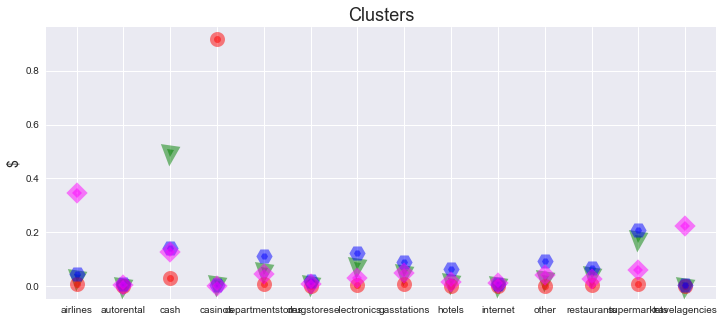

In [18]:
color=['green','red','blue','black','magenta','cyan']
sns.set(style='darkgrid')
plt.figure(figsize=(12,5))

plt.plot(res.iloc[0],'v',color="green",alpha=0.5,markeredgewidth=8)
plt.plot(res.iloc[1],'o',color="red",alpha=0.5,markeredgewidth=8)
plt.plot(res.iloc[2],"H",color="blue",alpha=0.5,markeredgewidth=8)
plt.plot(res.iloc[3],"D",color="magenta",alpha=0.5,markeredgewidth=8)

plt.title("Clusters",fontsize='18')
#plt.xlabel("Cash")
plt.ylabel("$",fontsize='14')
plt.show()